In [54]:
import pandas as pd

# Load dataset
df = pd.read_csv('./gym_exercise_data/megaGymDataset.csv')

print(df.head(2))


   Unnamed: 0                         Title  \
0           0        Partner plank band row   
1           1  Banded crunch isometric hold   

                                                Desc      Type    BodyPart  \
0  The partner plank band row is an abdominal exe...  Strength  Abdominals   
1  The banded crunch isometric hold is an exercis...  Strength  Abdominals   

  Equipment         Level  Rating RatingDesc  
0     Bands  Intermediate     0.0        NaN  
1     Bands  Intermediate     NaN        NaN  


In [55]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('./gym_exercise_data/megaGymDataset.csv')

# Encode categorical features
label_encoders = {}
categorical_columns = ['Level', 'BodyPart', 'Equipment', 'Title', 'Rating']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[f'{col}_encoded'] = label_encoders[col].fit_transform(df[col])

# Define features (X) and target (y)
X = df[['Level_encoded', 'BodyPart_encoded', 'Equipment_encoded','Rating_encoded']]
y = df['Title_encoded']

# Filter classes with less than 2 samples
min_samples = 2
class_counts = y.value_counts()
sufficient_classes = class_counts[class_counts >= min_samples].index
X = X[y.isin(sufficient_classes)]
y = y[y.isin(sufficient_classes)]

print("Updated Class Distribution:")
print(y.value_counts())

# Adjust test_size to ensure at least one sample per class
min_test_size = len(y.unique()) / len(y)  # Ensure test_size >= number of classes
test_size = max(0.3, min_test_size)  # Use either 30% or the calculated safe value

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42, stratify=y
)

# Oversample using RandomOverSampler and SMOTE
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_ros, y_ros)
print("Resampled Class Distribution:")
print(y_resampled.value_counts())

# Train Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Updated Class Distribution:
Title_encoded
317     3
2254    3
613     2
779     2
753     2
267     2
2304    2
Name: count, dtype: int64
Resampled Class Distribution:
Title_encoded
267     2
317     2
779     2
613     2
753     2
2254    2
2304    2
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

         267       1.00      1.00      1.00         1
         317       1.00      1.00      1.00         1
         613       1.00      1.00      1.00         1
         753       1.00      1.00      1.00         1
         779       1.00      1.00      1.00         1
        2254       1.00      1.00      1.00         1
        2304       1.00      1.00      1.00         1

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Confusion Matrix:
[[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]

In [56]:
# Handle missing values
df['Rating'] = df['Rating'].fillna(0)  # Replace NaN with 0 for Ratings
df['RatingDesc'] = df['RatingDesc'].fillna("No Rating")  # Replace NaN with "No Rating"


# Normalize text columns
text_columns = ['Title', 'Desc', 'Type', 'BodyPart', 'Equipment', 'Level']
for col in text_columns:
    df[col] = df[col].str.lower()

# Verify there are no missing values left
print("Missing Values After Handling:\n", df.isnull().sum())
print("Normalized Data:\n",df.head())


Missing Values After Handling:
 Unnamed: 0              0
Title                   0
Desc                 1550
Type                    0
BodyPart                0
Equipment              32
Level                   0
Rating                  0
RatingDesc              0
Level_encoded           0
BodyPart_encoded        0
Equipment_encoded       0
Title_encoded           0
Rating_encoded          0
dtype: int64
Normalized Data:
    Unnamed: 0                         Title  \
0           0        partner plank band row   
1           1  banded crunch isometric hold   
2           2         fyr banded plank jack   
3           3                 banded crunch   
4           4                        crunch   

                                                Desc      Type    BodyPart  \
0  the partner plank band row is an abdominal exe...  strength  abdominals   
1  the banded crunch isometric hold is an exercis...  strength  abdominals   
2  the banded plank jack is a variation on the pl...  st

In [57]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode BodyPart, Level, and other features individually
df['BodyPart_encoded'] = label_encoder.fit_transform(df['BodyPart'])
df['Level_encoded'] = label_encoder.fit_transform(df['Level'])
df['Type_encoded'] = label_encoder.fit_transform(df['Type'])
df['Equipment_encoded'] = label_encoder.fit_transform(df['Equipment'])

# Optionally encode Title for ML purposes, but do NOT overwrite
df['exercise_encoded'] = label_encoder.fit_transform(df['Title'])

# Verify encoding
print("Encoded Data Sample:\n", df[['Title','BodyPart', 'BodyPart_encoded', 'Level', 'Level_encoded']].head())


Encoded Data Sample:
                           Title    BodyPart  BodyPart_encoded         Level  \
0        partner plank band row  abdominals                 0  intermediate   
1  banded crunch isometric hold  abdominals                 0  intermediate   
2         fyr banded plank jack  abdominals                 0  intermediate   
3                 banded crunch  abdominals                 0  intermediate   
4                        crunch  abdominals                 0  intermediate   

   Level_encoded  
0              2  
1              2  
2              2  
3              2  
4              2  


In [58]:
#Group by BodyPart and Level
bodypart_group = df.groupby(['BodyPart', 'Level']) 
#print(bodypart_group.size())

filtered_exercises = df[(df['BodyPart'] == 'biceps') & (df['Level'] == 'beginner')]
print(filtered_exercises[['Title', 'Desc', 'Equipment']])

                                            Title  \
704                                brachialis smr   
705                        wide-grip barbell curl   
708                        close-grip ez-bar curl   
710        barbell curls lying against an incline   
711  seated close-grip concentration barbell curl   
712                       close-grip barbell curl   
713                                     drag curl   
715                 lying high bench barbell curl   
716      seated wide-grip curl to close-grip curl   
717              seated straigh-bar curl superset   
731                          incline hammer curls   
733                 biceps curl to shoulder press   
735                 flexor incline dumbbell curls   
737                        cross-body hammer curl   
741                   standing concentration curl   
745                 preacher hammer dumbbell curl   
747                    lying supine dumbbell curl   
748                standing dumbbell reverse c

In [59]:
#Define user weight and age groups
def categorize_user(weight, age):
    if weight < 60:
        weight_group = 'light'
    elif weight >= 60 and weight < 80:
        weight_group = 'medium'
    else:
        weight_group = 'heavy'
    if age < 20:
        age_group = 'Teenager'
    elif age >= 20 and age < 40:
        age_group = 'Adult'
    else:
        age_group = 'senior'
    return weight_group, age_group

In [60]:
def recommend_exercise(df, weight, age, body_part = None):
    weight_group, age_group = categorize_user(weight, age)
    
    if age_group == 'Teenager':
        levels = ['beginner', 'intermediate']
    else:
        levels = ['intermediate', 'expert']
    
    #print(f"Filtering for levels: {levels}")
    recommendations = df[(df['Level'].isin(levels))]
    #print(f"Filtered by level:\n{recommendations[['Title', 'Level']]}")
    
    body_part_mapping = {
        'legs': ['quadriceps', 'hamstrings', 'calves'],
        'arms': ['biceps', 'triceps', 'forearms'],
        'back': ['lower back', 'middle back', 'lats', 'traps'],
        'core': ['abdominals', 'obliques'],
        'shoulders': ['shoulders'],
        'glutes': ['glutes']
    }
    
    
    if body_part:
        specific_parts = body_part_mapping.get(body_part.lower(), [body_part.lower()])
        recommendations = recommendations[recommendations['BodyPart'].isin(specific_parts)]
        
        #print(f"Filtered by BodyPart ({body_part}):\n{recommendations[['Title', 'BodyPart']]}")

    return recommendations[['Title', 'Desc', 'Equipment', 'Level', 'Rating']].sort_values(by = 'Rating', ascending = False)

user_weight = 70
user_age = 25
recommendations = recommend_exercise(df, user_weight, user_age, body_part='legs')
#print(recommendations)

#Handling 0.0 ratings
recommendations = recommendations[recommendations['Rating'] > 0.0]

top_recommendations = recommendations.head(5)
#print(top_recommendations)

print(f"Found {len(recommendations)} exercises matching your criteria.")
print(top_recommendations[['Title', 'Level' ,'Rating']])

#print("Unique Levels:", df['Level'].unique())
#print("Unique Body Parts:", df['BodyPart'].unique())

Found 125 exercises matching your criteria.
                          Title         Level  Rating
2065           single-leg press  intermediate     9.6
1997                  tire flip  intermediate     9.4
1292           barbell deadlift  intermediate     9.4
1799         barbell full squat  intermediate     9.4
1800  barbell back squat to box  intermediate     9.3


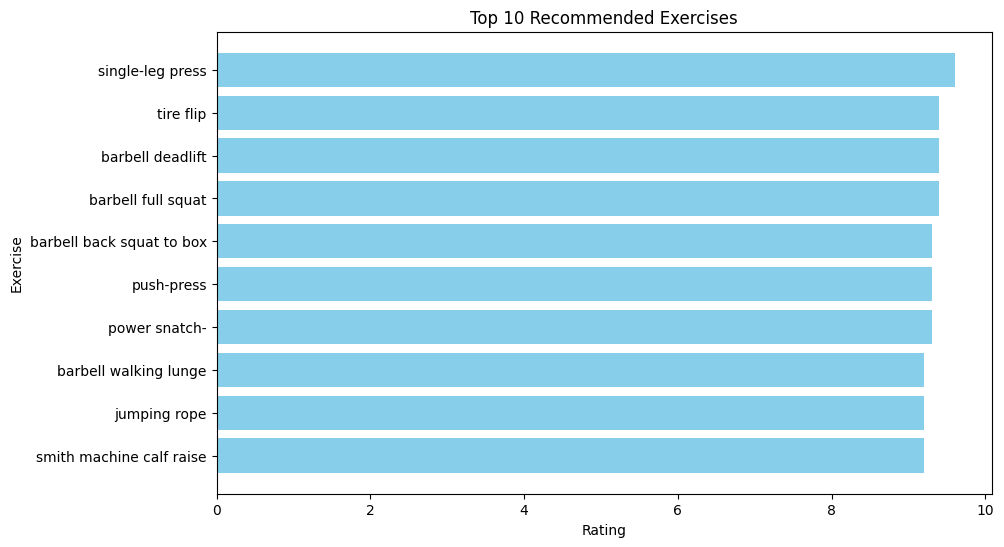

In [61]:
import matplotlib.pyplot as plt

recommendations = recommendations.head(10)  # Top 10 recommendations
plt.figure(figsize=(10, 6))
plt.barh(recommendations['Title'], recommendations['Rating'], color='skyblue')
plt.xlabel("Rating")
plt.ylabel("Exercise")
plt.title("Top 10 Recommended Exercises")
plt.gca().invert_yaxis()  # Invert to show the highest-rated first
plt.show()


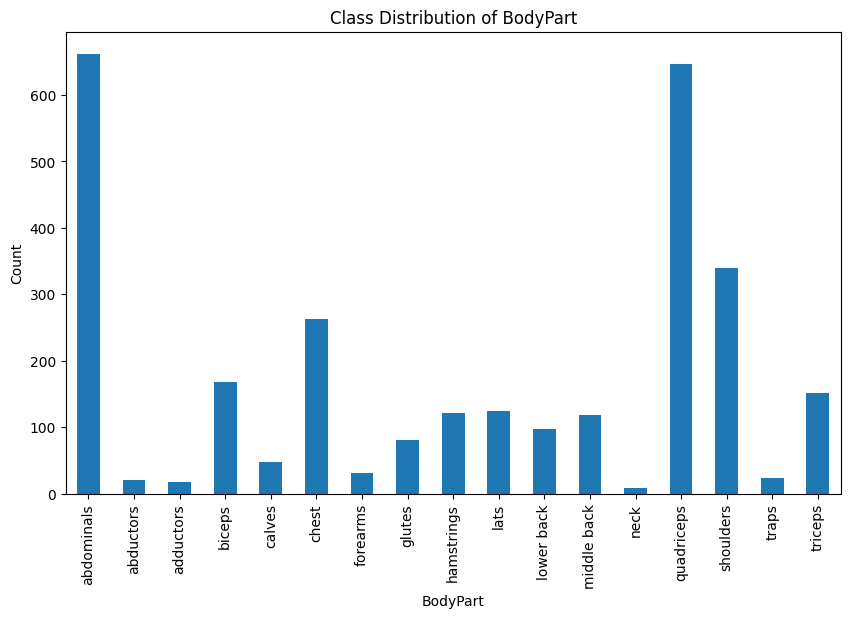

In [62]:
import matplotlib.pyplot as plt

bodypart_distribution = df.groupby('BodyPart')['exercise_encoded'].count()
bodypart_distribution.plot(kind='bar', figsize=(10, 6))


# Plot class distribution
plt.title('Class Distribution of BodyPart')
plt.xlabel('BodyPart')
plt.ylabel('Count')
plt.show()


In [63]:
from imblearn.over_sampling import RandomOverSampler, SMOTE


X = df[['Level_encoded', 'BodyPart_encoded', 'Equipment_encoded']]
y = df['exercise_encoded']
# Set k_neighbors to 1 to avoid the error
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

smote = SMOTE(random_state=42, k_neighbors=1)
#X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after RandomOverSampler:")
print(pd.Series(y_ros).value_counts())


Class distribution after RandomOverSampler:
exercise_encoded
2074    3
691     3
853     3
743     3
669     3
       ..
2718    3
2127    3
563     3
2666    3
19      3
Name: count, Length: 2909, dtype: int64


In [64]:
#Applying SMOTE after RandomOverSampler

X_resampled, y_resampled = smote.fit_resample(X_ros, y_ros)

print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution after SMOTE:
exercise_encoded
2074    3
691     3
853     3
743     3
669     3
       ..
2718    3
2127    3
563     3
2666    3
19      3
Name: count, Length: 2909, dtype: int64


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(df['exercise_encoded'].value_counts())

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         1
          39       0.00    

/Users/adicadi/Aditya/FitnessTracker/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adicadi/Aditya/FitnessTracker/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adicadi/Aditya/FitnessTracker/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

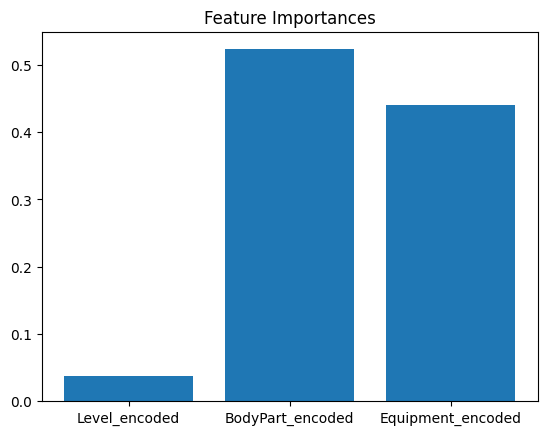

In [66]:
import matplotlib.pyplot as plt
feature_importances = model.feature_importances_
plt.bar(['Level_encoded', 'BodyPart_encoded', 'Equipment_encoded'], feature_importances)
plt.title("Feature Importances")
plt.show()

In [67]:
input_data = [[1, 0, 2]] # Intermediate level, legs, Dumbbells

prediction = model.predict(input_data)
decoded_prediction = label_encoder.inverse_transform(prediction)
print("Predicted Exercise:", decoded_prediction[0])

Predicted Exercise: dumbbell get-up sit-up


/Users/adicadi/Aditya/FitnessTracker/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
